# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 2 Memuat Data

In [2]:
# Gantilah ID file dengan ID dari Google Drive URL
file_id = '19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO'
 
# Buat URL unduhan langsung
download_url = f'https://drive.google.com/uc?id={file_id}'
 
# Baca file CSV dari URL
data = pd.read_csv(download_url)
 
# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.1 Tampilkan informasi umum tentang dataset

In [3]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- RowNumber: Nomor baris dalam dataset yang digunakan untuk identifikasi unik setiap entri. Fitur ini tidak memiliki makna analitis.
- CustomerId: ID unik yang mengidentifikasi setiap pelanggan dalam sistem. Ini berguna untuk referensi dan penggabungan data.
- Surname: Nama belakang pelanggan. Fitur ini tidak digunakan dalam analisis model karena tidak relevan.
- CreditScore: Skor kredit yang menunjukkan kelayakan kredit pelanggan. Skor ini dapat memengaruhi keputusan mereka untuk tetap atau berhenti menggunakan layanan.
- Geography: Lokasi geografis tempat tinggal pelanggan. Informasi ini dapat memengaruhi perilaku dan kebutuhan layanan pelanggan.
- Gender: Jenis kelamin pelanggan. Meskipun tidak selalu memengaruhi churn secara langsung, informasi ini berguna untuk analisis demografis.
- Age: Usia pelanggan. Usia dapat memengaruhi kebiasaan dan preferensi dalam menggunakan layanan.
- Tenure: Lama berlangganan pelanggan. Durasi berlangganan ini sering kali berhubungan dengan kemungkinan pelanggan untuk churn.
- Balance: Saldo rekening pelanggan. Saldo ini dapat memengaruhi kepuasan pelanggan dan kecenderungan mereka untuk tetap menggunakan layanan.
- NumOfProducts: Jumlah produk yang dimiliki pelanggan. Fitur ini membantu memahami keterlibatan pelanggan dengan berbagai produk.
- HasCrCard: Ini menunjukkan pelanggan memiliki kartu kredit atau tidak. Fitur ini dapat memengaruhi pengalaman pelanggan dengan layanan.
- IsActiveMember: Status keanggotaan aktif pelanggan. Ini menunjukkan pelanggan masih aktif atau tidak dalam menggunakan layanan.
- EstimatedSalary: Gaji yang diperkirakan dari pelanggan. Gaji dapat memengaruhi keputusan pelanggan untuk berlangganan atau berhenti dari layanan.
- Exited: Label target yang menunjukkan pelanggan telah keluar dari layanan (1) atau tidak (0). Fitur ini merupakan variabel yang ingin diprediksi dalam model klasifikasi.

### 2.2 Cek Missing Value

In [4]:
print("\nMissing values per fitur:")
data.isna().sum()


Missing values per fitur:


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 2.3. Hapus Kolom tidak Relevan

In [5]:
data = data.drop(columns=['RowNumber', "CustomerId", "Surname"])
print("\nDataset setelah menghapus kolom yang tidak diperlukan:")
data.info()
data.head()


Dataset setelah menghapus kolom yang tidak diperlukan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3 Exploratory Data Analysis (EDA)

Dalam tahap ini, distribusi fitur numerik pertama-tama dianalisis. Setiap fitur numerik divisualisasikan menggunakan histogram yang menunjukkan distribusi nilai-nilai dalam fitur tersebut. Histogram ini dilengkapi dengan kurva densitas untuk memberikan gambaran lebih jelas tentang pola distribusi data: apakah data terdistribusi normal atau mengalami skewness?

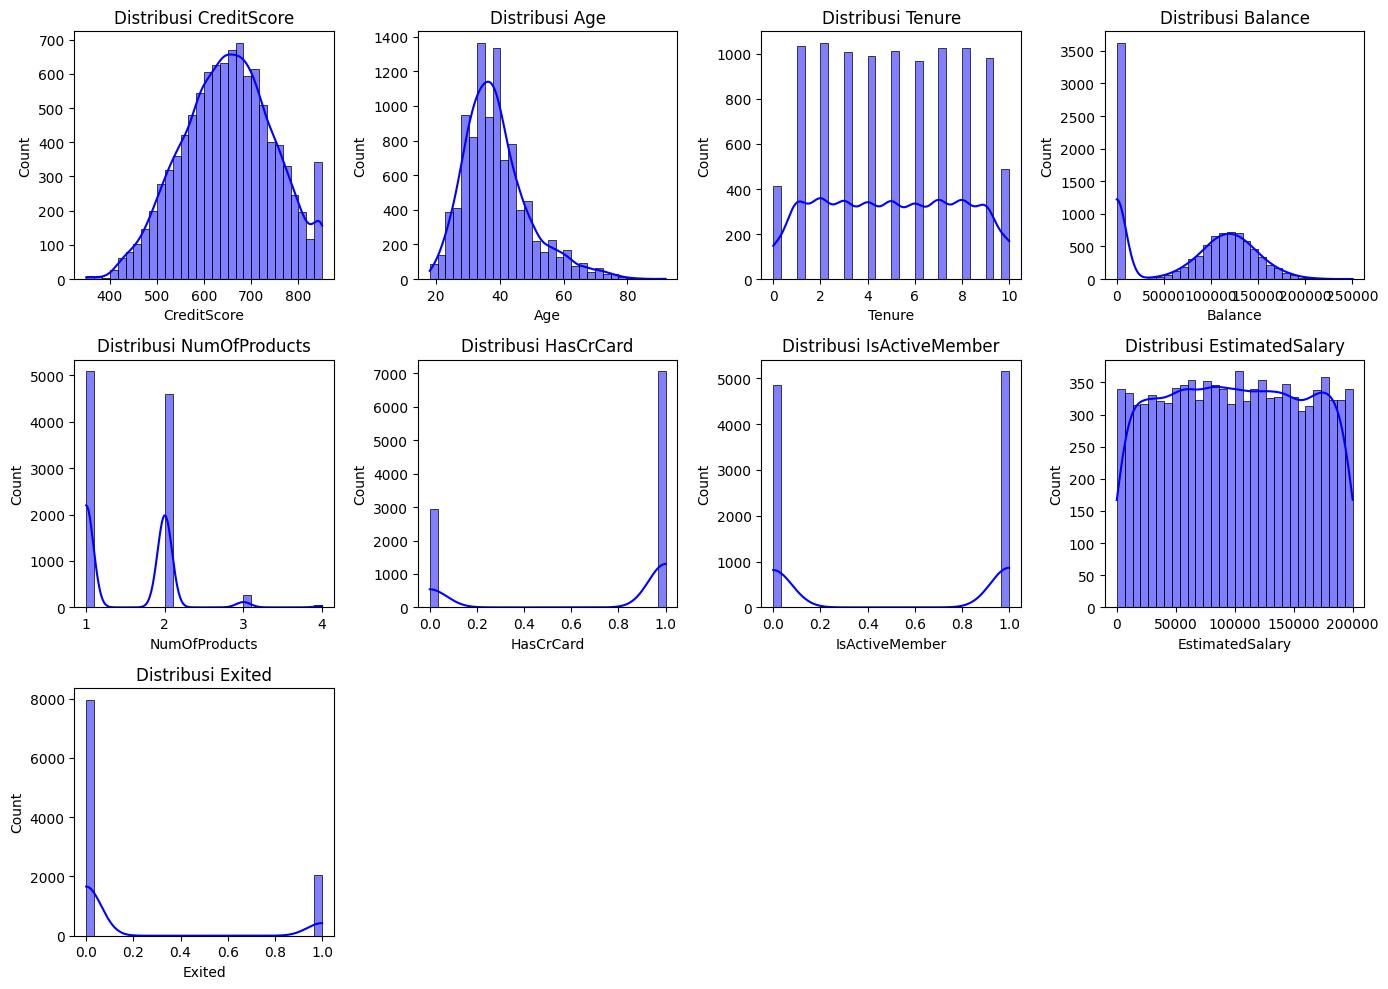

In [6]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Selanjutnya, distribusi fitur kategorikal diperiksa dengan menggunakan grafik batang horizontal. Grafik ini memperlihatkan frekuensi setiap kategori dalam fitur kategorikal, membantu untuk memahami seberapa sering masing-masing kategori muncul dalam dataset. 

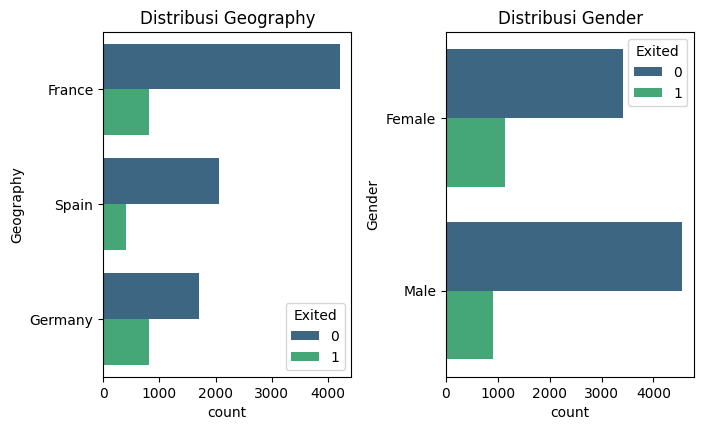

In [12]:
# Distribusi fitur kategorikal
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column], palette='viridis', hue=data['Exited'])
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Matriks Korelasi

Kode ini menghasilkan heatmap korelasi yang memvisualisasikan hubungan antar fitur numerik dalam dataset. Dengan ukuran gambar 12 × 10 inci, heatmap ini menggunakan skema warna 'coolwarm' untuk menampilkan kekuatan korelasi antara fitur-fitur, dari korelasi negatif (biru) hingga positif (merah). 

Nilai korelasi ditampilkan pada setiap sel dengan format dua desimal, sementara garis pembatas yang tipis antara sel memudahkan pembacaan. Matriks korelasi dihitung menggunakan fungsi corr() dari pandas yang mengukur hubungan linier antara fitur-fitur numerik.

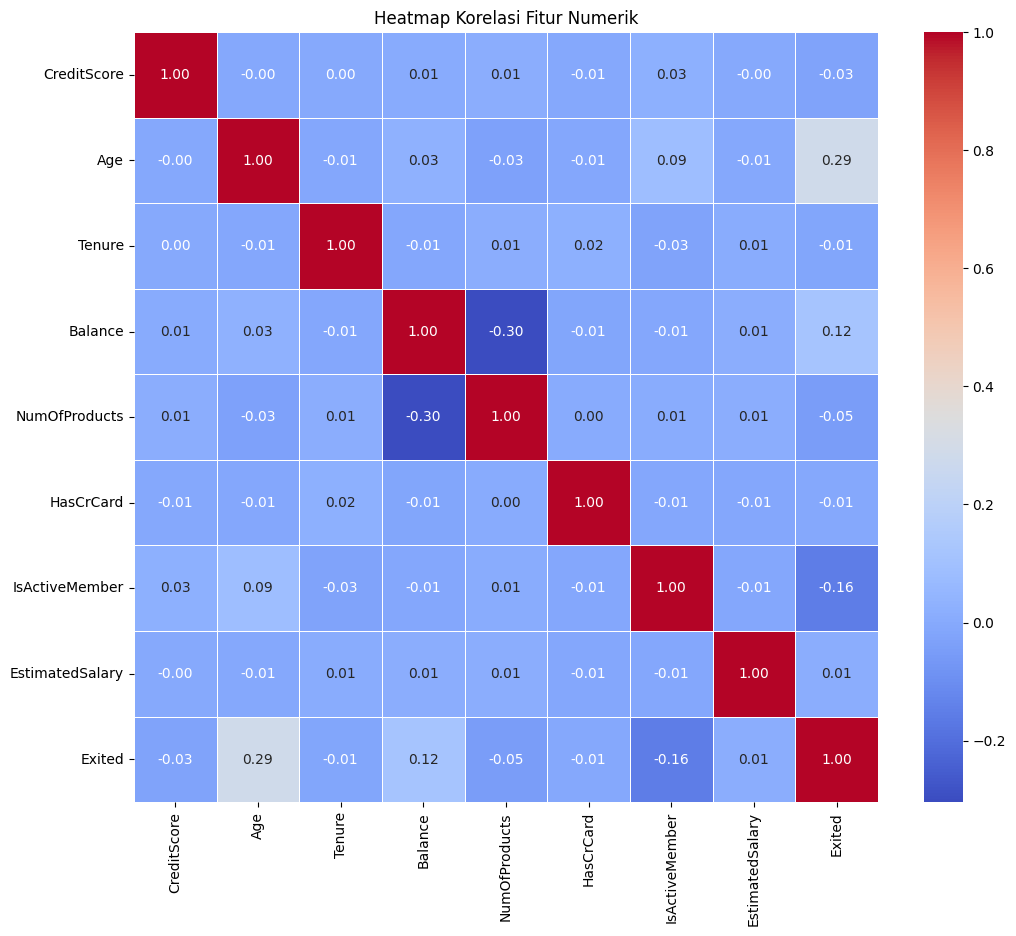

In [13]:
# Heatmap korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

Pairplot

Pairplot ini menyajikan grafik scatter plot untuk setiap pasangan fitur numerik yang memungkinkan visualisasi hubungan antara fitur-fitur tersebut. Selain itu, diagonal pairplot menampilkan histogram dari distribusi masing-masing fitur. 

Dengan cara ini, pairplot membantu dalam mengidentifikasi pola, korelasi, dan distribusi di antara fitur-fitur numerik, serta mendeteksi potensi outlier atau hubungan non-linier yang mungkin ada. Berikut hasilnya.

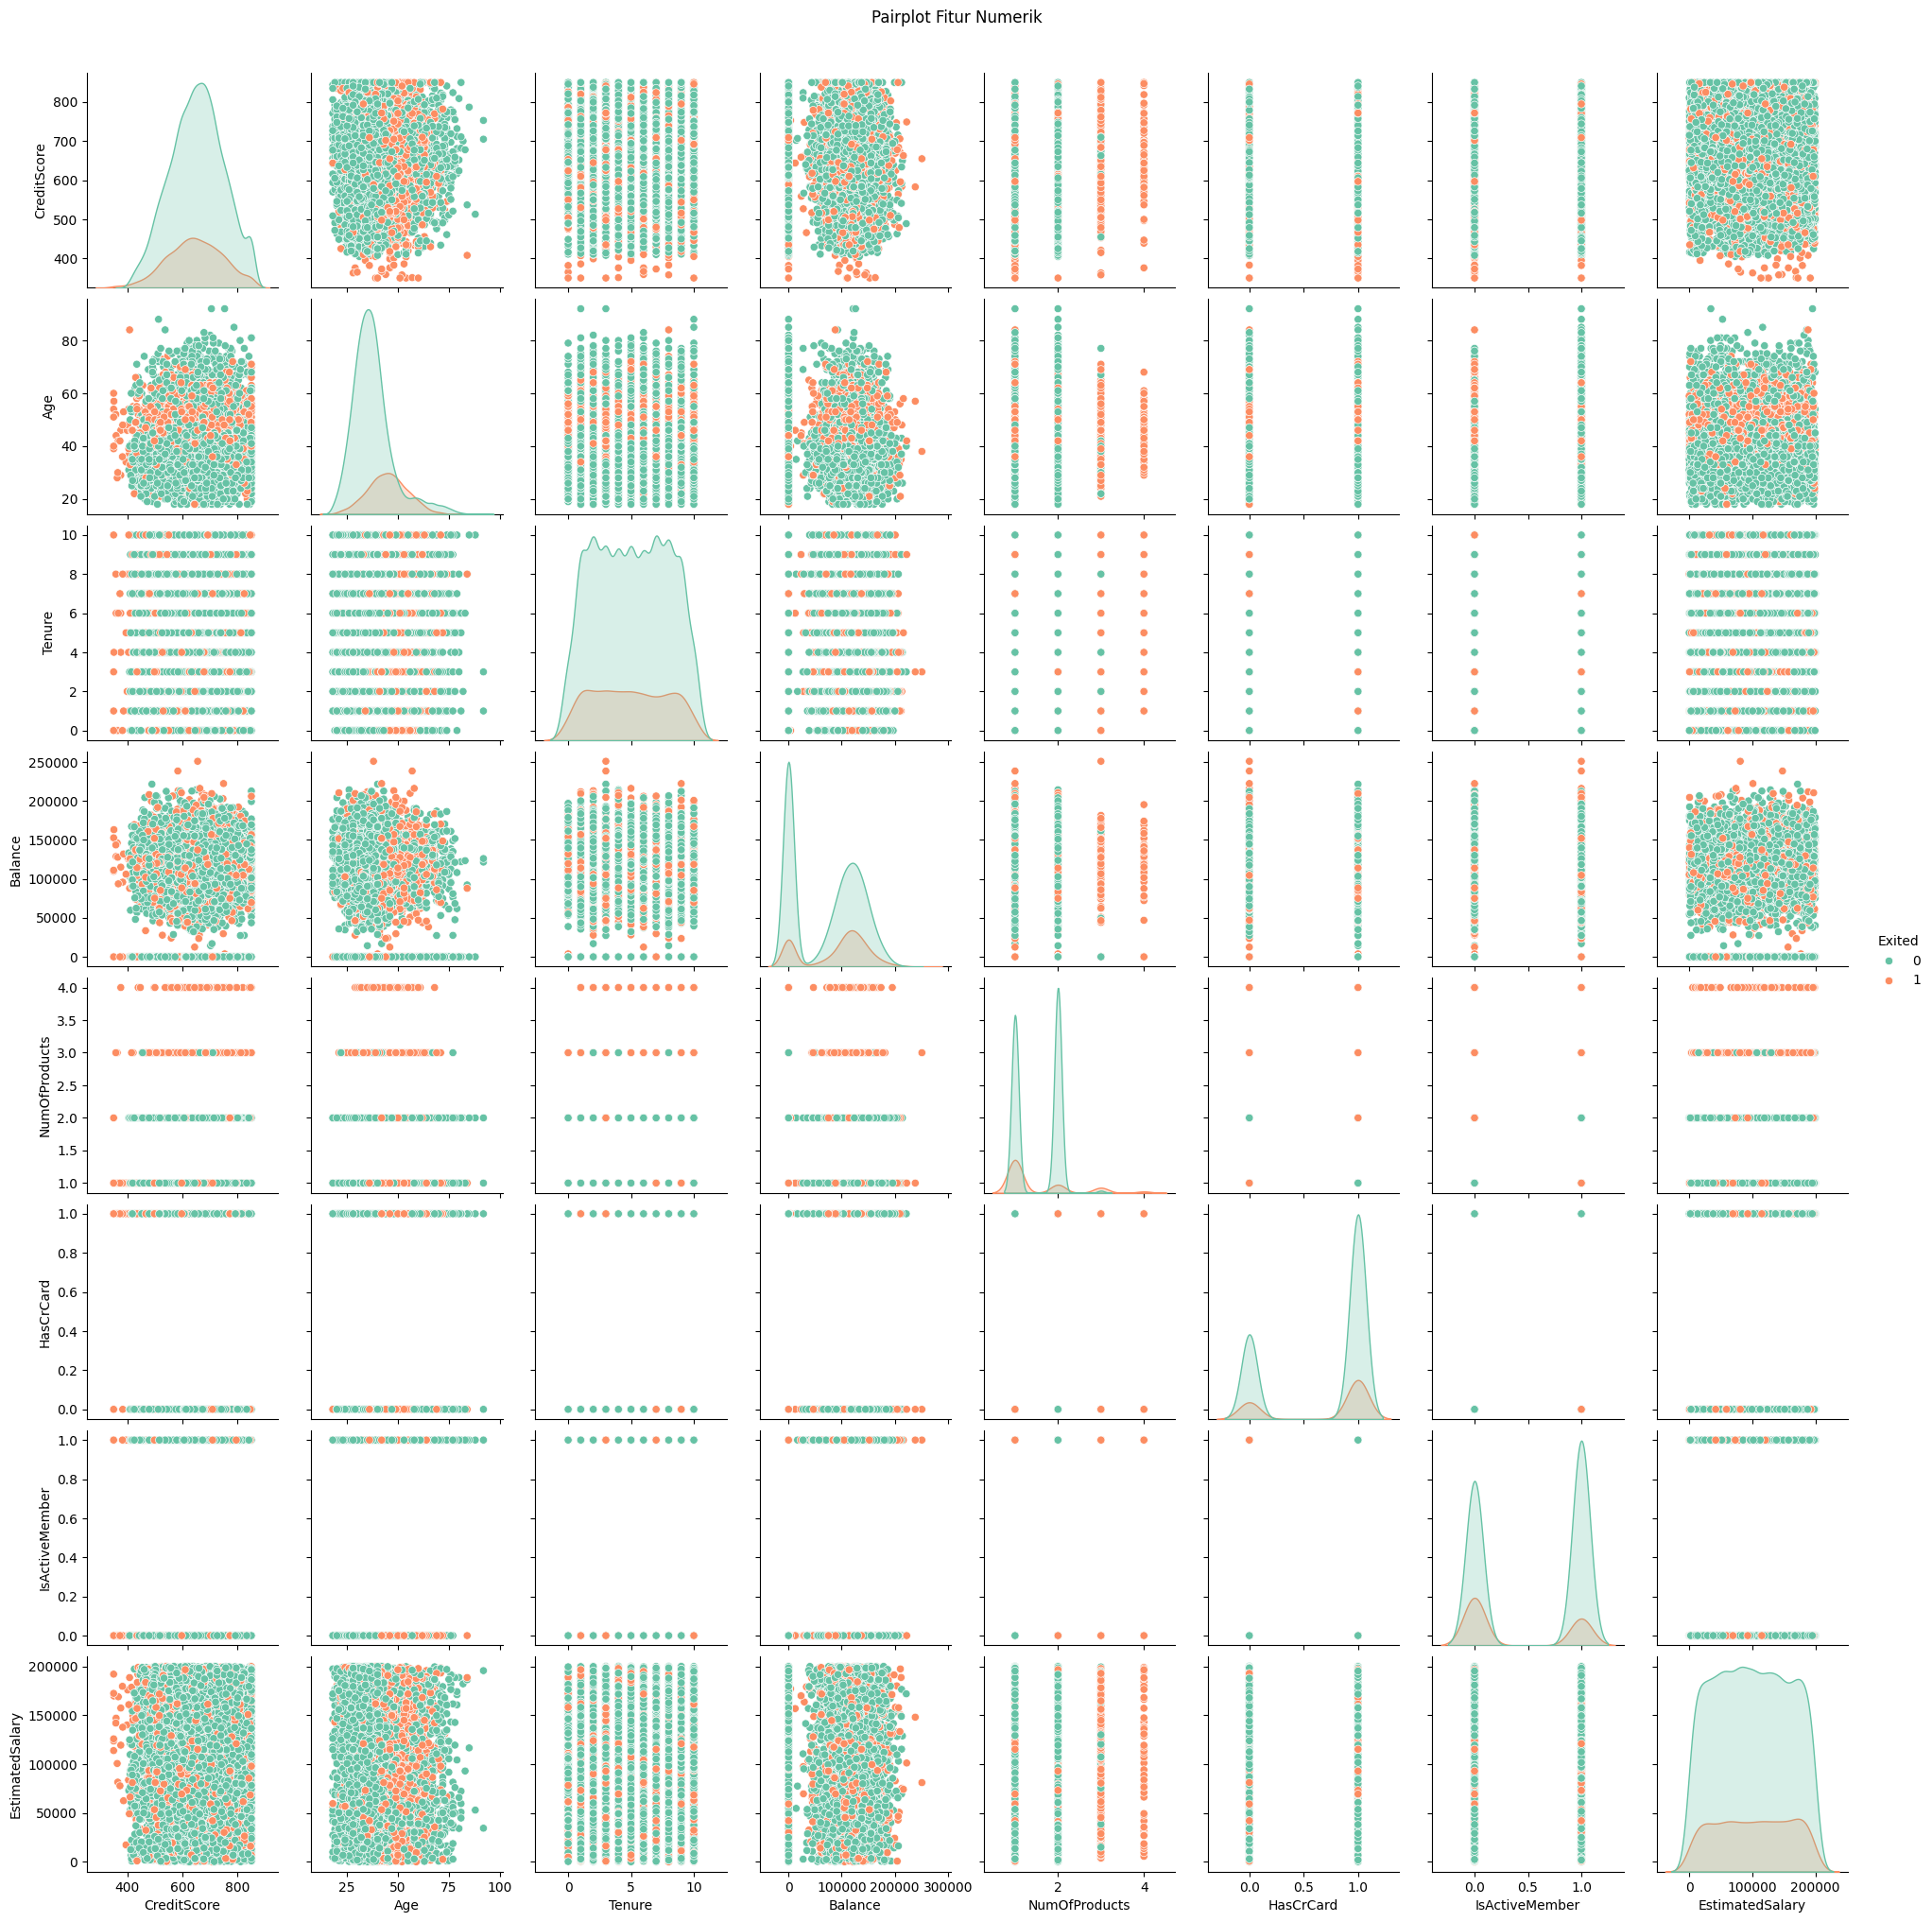

In [15]:
# Pairplot fitur numerik
sns.pairplot(num_features, hue='Exited', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot Fitur Numerik', y=1.02)
plt.show()

Dsitribusi Target (Exited)

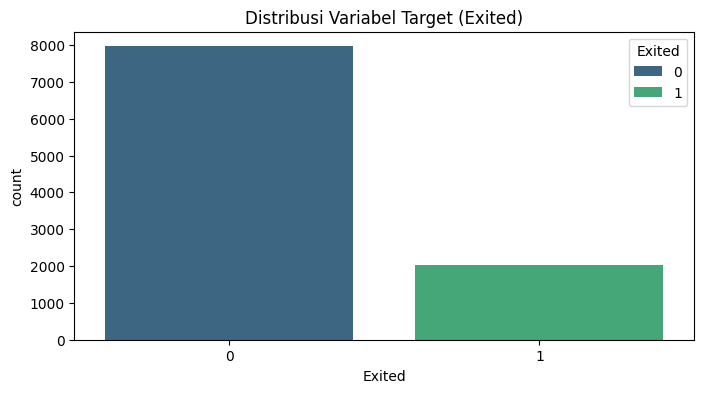

In [17]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Exited', data=data, palette='viridis', hue='Exited')
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

Pada bagian ini, terlihat adanya ketidakseimbangan antara jumlah pelanggan yang keluar (churn) dan yang tidak keluar dalam dataset. Ketidakseimbangan ini sering kali dapat memengaruhi performa model klasifikasi. 

Meskipun demikian, permasalahan ini akan dibahas lebih lanjut dalam modul selanjutnya. Untuk latihan klasifikasi saat ini, fokus dapat tetap pada implementasi model tanpa harus memperhatikan ketidakseimbangan kelas ini terlebih dahulu.

# 4 Label Encoder

Pada langkah ini, encoding diterapkan pada fitur kategorikal dalam dataset untuk mempersiapkan data bagi algoritma pembelajaran mesin. LabelEncoder digunakan untuk mengonversi nilai kategorikal menjadi format numerik yang dapat diproses oleh model.

In [18]:
# Buat instance dari LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang akan di-encode
categorical_columns = ['Geography', 'Gender']

# Lakukan encoding pada setiap kolom kategorikal
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Tampilkan dataset setelah encoding
print("\nDataset setelah encoding fitur kategorikal:")
data.head()


Dataset setelah encoding fitur kategorikal:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# 5 Data Splitting

Pada langkah ini, data numerik dinormalisasi menggunakan MinMaxScaler untuk memastikan bahwa semua fitur numerik berada dalam rentang yang sama, yang dapat meningkatkan performa model. Setelah normalisasi, data dibagi menjadi fitur (X) dan target (y). 

Data kemudian dipisahkan menjadi set pelatihan dan set uji menggunakan train_test_split dengan 20% data digunakan untuk uji dan 80% untuk pelatihan. Bentuk dari set pelatihan dan set uji ditampilkan untuk memastikan bahwa pemisahan telah dilakukan dengan benar.

In [19]:
# buat instance MInMaxScaler
scaler = MinMaxScaler()

# normalisasi fitur numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# tampilkan dataset setelah normalisasi
print("\nDataset setelah normalisasi fitur numerik:")
data.head()


Dataset setelah normalisasi fitur numerik:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


In [21]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Exited'])
y = data['Exited']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"\nBentuk set pelatihan: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Bentuk set uji: X_test: {X_test.shape}, y_test: {y_test.shape}")


Bentuk set pelatihan: X_train: (8000, 10), y_train: (8000,)
Bentuk set uji: X_test: (2000, 10), y_test: (2000,)


# 6. Pelatihan Model

Pada langkah ini, setiap algoritma klasifikasi dilatih secara terpisah dengan menggunakan data pelatihan. Model KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, SVC, dan GaussianNB dipersiapkan serta dilatih. Setelah proses pelatihan selesai, model-model ini siap untuk diuji dengan data uji. Pesan "Model training selesai." menandakan bahwa semua model sudah berhasil dilatih.

In [24]:
# Definisikan  setiap model klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm = SVC(random_state=42).fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("\nModel klasifikasi telah dilatih.")


Model klasifikasi telah dilatih.


# 7. Evaluasi Model

Pada langkah ini, setiap model dievaluasi untuk mengukur kinerjanya. Fungsi evaluate_model digunakan untuk menghitung berbagai metrik performa, seperti matriks kebingungannya (confusion matrix), serta skor akurasi, presisi, recall, dan F1-Score. 

Hasil evaluasi dari setiap model—yaitu K-Nearest Neighbors (KNN), Decision Tree (DT), Random Forest (RF), Support Vector Machine (SVM), dan Naive Bayes (NB)—dikumpulkan dalam sebuah DataFrame yang merangkum semua metrik penting tersebut. DataFrame ini kemudian ditampilkan untuk memberikan gambaran jelas mengenai kinerja masing-masing model.

In [ ]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results
 
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svc, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)    0.8240   0.595349  0.325700  0.421053
1            Decision Tree (DT)    0.7805   0.449561  0.521628  0.482921
2            Random Forest (RF)    0.8655   0.752033  0.470738  0.579030
3  Support Vector Machine (SVM)    0.8530   0.827815  0.318066  0.459559
4              Naive Bayes (NB)    0.8285   0.681159  0.239186  0.354049


### Hasil Confusion Matix KNN

<Figure size 500x400 with 0 Axes>

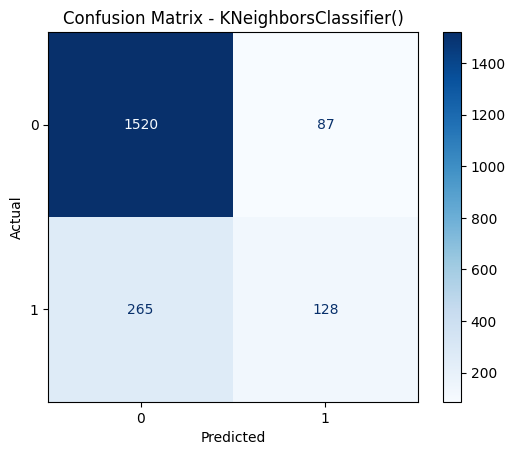

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

models = knn
plt.figure(figsize=(5, 4))
disp = ConfusionMatrixDisplay.from_estimator(models, X_test, y_test, display_labels=[0, 1], cmap='Blues', normalize=None)
disp.ax_.set_title(f'Confusion Matrix - {models}')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.show()

Model K-Nearest Neighbors (KNN) menunjukkan hasil evaluasi sebagai berikut. Matriks kebingungan mengungkapkan bahwa model berhasil mengidentifikasi 128 pelanggan yang sebenarnya churn (true positive) dengan benar, sementara 87 pelanggan yang sebenarnya tidak churn teridentifikasi sebagai churn (false positive).

Sebaliknya, ada 265 pelanggan yang sebenarnya churn, tetapi tidak terdeteksi oleh model (false negative) dan 1520 pelanggan yang benar-benar tidak churn dan diprediksi dengan benar (true negative). Hasil ini memberikan gambaran tentang kemampuan model KNN dalam mengklasifikasikan pelanggan dengan tepat.

### Confusion Matrix Decision Tree

<Figure size 500x400 with 0 Axes>

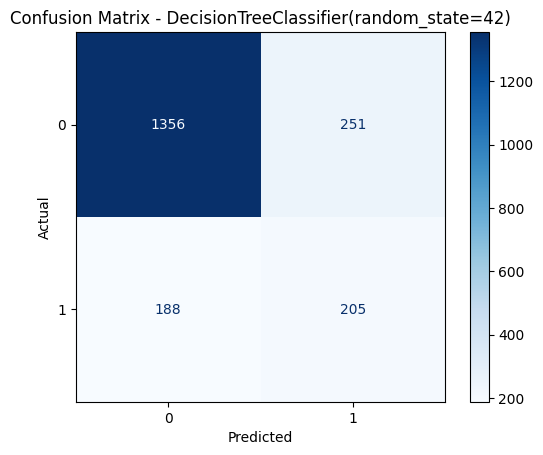

In [ ]:
models = dt
plt.figure(figsize=(5, 4))
disp = ConfusionMatrixDisplay.from_estimator(models, X_test, y_test, display_labels=[0, 1], cmap='Blues', normalize=None)
disp.ax_.set_title(f'Confusion Matrix - {models}')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.show()

Untuk Decision Tree Classifier, hasil evaluasi menunjukkan distribusi prediksi sebagai berikut: ada 1360 true negative (TN) yang berarti pelanggan tidak churn terdeteksi dengan benar. Sebanyak 247 false positive (FP) menunjukkan bahwa pelanggan yang tidak churn salah diklasifikasikan sebagai churn.

Selain itu, 193 false negative (FN) menggambarkan pelanggan yang sebenarnya churn, tetapi tidak teridentifikasi oleh model. Akhirnya, model berhasil mendeteksi 200 true positive (TP), yaitu pelanggan yang benar-benar churn. Analisis ini memberikan wawasan tentang kinerja model dalam memprediksi churn dan area yang perlu diperbaiki.

### Confusion Matrix Random Forest

<Figure size 500x400 with 0 Axes>

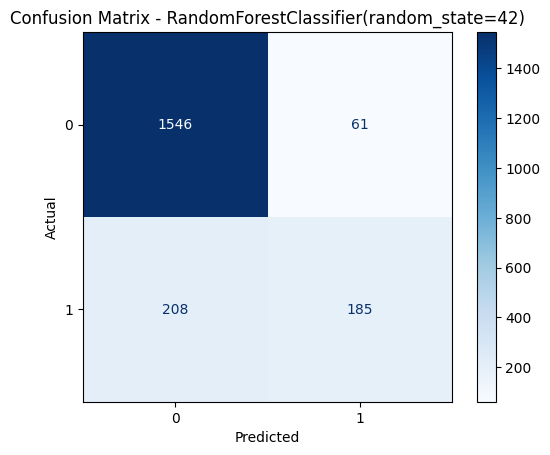

In [34]:
models = rf
plt.figure(figsize=(5, 4))
disp = ConfusionMatrixDisplay.from_estimator(models, X_test, y_test, display_labels=[0, 1], cmap='Blues', normalize=None)
disp.ax_.set_title(f'Confusion Matrix - {models}')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.show()

Untuk Random Forest Classifier, hasil evaluasi menunjukkan distribusi prediksi sebagai berikut: ada 1557 true negative (TN) yang berarti pelanggan tidak churn terdeteksi dengan benar. Sebanyak 50 false positive (FP) menunjukkan pelanggan yang tidak churn salah diklasifikasikan sebagai churn. 

Model ini juga menghasilkan 211 false negative (FN) yang menggambarkan pelanggan yang sebenarnya churn, tetapi tidak teridentifikasi oleh model. Terakhir, ada 182 true positive (TP), yaitu pelanggan benar-benar churn yang berhasil terdeteksi oleh model. Hasil ini memberikan gambaran tentang seberapa baik Random Forest dalam memprediksi churn dan menunjukkan bahwa model menangani masing-masing kelas.

### Confusion Matrix SVM

<Figure size 500x400 with 0 Axes>

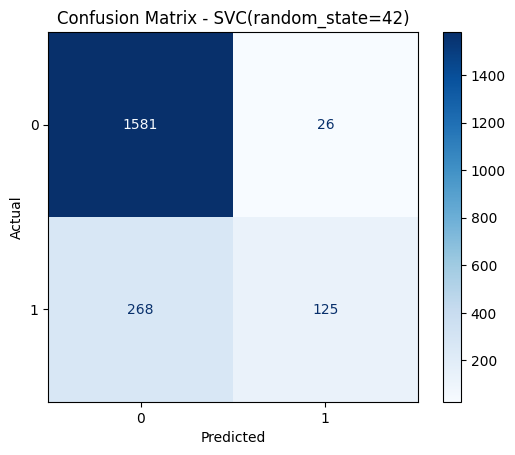

In [35]:
models = svm
plt.figure(figsize=(5, 4))
disp = ConfusionMatrixDisplay.from_estimator(models, X_test, y_test, display_labels=[0, 1], cmap='Blues', normalize=None)
disp.ax_.set_title(f'Confusion Matrix - {models}')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.show()

Untuk Support Vector Machine (SVM) Classifier, hasil evaluasi menunjukkan distribusi prediksi sebagai berikut: ada 1581 true negative (TN), yang berarti pelanggan tidak churn terdeteksi dengan benar. Sebanyak 26 false positive (FP) menunjukkan pelanggan yang tidak churn salah diklasifikasikan sebagai churn.

Model ini juga menghasilkan 268 false negative (FN), menggambarkan pelanggan yang sebenarnya churn, tetapi tidak teridentifikasi oleh model. Terakhir, ada 125 true positive (TP), yaitu pelanggan benar-benar churn yang berhasil terdeteksi oleh model. Hasil ini mencerminkan bahwa SVM mengelola prediksi churn dan performanya dalam klasifikasi.

### Confusion Matrix Naive Bayes

<Figure size 500x400 with 0 Axes>

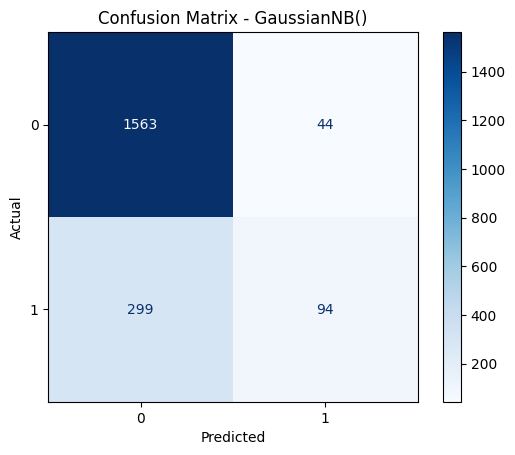

In [36]:
models = nb
plt.figure(figsize=(5, 4))
disp = ConfusionMatrixDisplay.from_estimator(models, X_test, y_test, display_labels=[0, 1], cmap='Blues', normalize=None)
disp.ax_.set_title(f'Confusion Matrix - {models}')
disp.ax_.set_xlabel('Predicted')
disp.ax_.set_ylabel('Actual')
plt.show()

Untuk Naive Bayes Classifier, hasil evaluasi memberikan gambaran sebagai berikut: ada 1563 true negative (TN), menunjukkan jumlah pelanggan tidak churn yang terdeteksi dengan benar. Sebanyak 44 false positive (FP) menunjukkan pelanggan yang tidak churn salah diklasifikasikan sebagai churn. 

Model ini juga menghasilkan 299 false negative (FN), menunjukkan pelanggan yang sebenarnya churn, tetapi tidak teridentifikasi sebagai churn. Terakhir, ada 94 true positive (TP), yaitu pelanggan benar-benar churn yang berhasil terdeteksi oleh model. Hasil ini menggambarkan performa Naive Bayes dalam mengidentifikasi pelanggan yang akan churn.

# 9. Rangkuman Hasil

In [37]:
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
 
# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
 
# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)
 
# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)    0.8240   0.595349  0.325700  0.421053
1            Decision Tree (DT)    0.7805   0.449561  0.521628  0.482921
2            Random Forest (RF)    0.8655   0.752033  0.470738  0.579030
3  Support Vector Machine (SVM)    0.8530   0.827815  0.318066  0.459559
4              Naive Bayes (NB)    0.8285   0.681159  0.239186  0.354049


- K-Nearest Neighbors (KNN) menunjukkan akurasi sebesar 82.40%. Model ini memiliki precision 59.53%, recall 32.57%, dan F1-Score 42.11%. Angka precision yang relatif tinggi menunjukkan bahwa ketika model mengklasifikasikan seseorang sebagai churn, kemungkinan besar prediksi tersebut benar. Namun, recall yang rendah menunjukkan bahwa model ini sering gagal dalam mengidentifikasi pelanggan yang benar-benar churn.

- Decision Tree memperoleh akurasi sebesar 78.00%. Precision-nya adalah 44.74%, recall 50.89%, dan F1-Score 47.62%. Precision yang lebih rendah dibandingkan dengan KNN menunjukkan bahwa model ini kurang efektif dalam menghindari false positives. Meskipun recall-nya lebih baik, model ini masih kurang dalam hal ketepatan keseluruhan.

- Random Forest tampil dengan akurasi tertinggi sebesar 86.95%. Model ini memiliki precision 78.45%, recall 46.31%, dan F1-Score 58.24%. Tingginya precision menunjukkan model ini sangat baik dalam mengidentifikasi pelanggan yang churn dengan benar dan F1-Score yang baik menunjukkan keseimbangan yang baik antara precision dan recall.

- Support Vector Machine (SVM) memiliki akurasi 85.30%. Precision-nya mencapai 82.78%, recall 31.81%, dan F1-Score 45.96%. Precision yang sangat tinggi menandakan bahwa SVM efektif dalam mengklasifikasikan pelanggan yang churn. Namun, rendahnya recall menunjukkan bahwa model ini mungkin melewatkan banyak pelanggan churn yang sebenarnya.

- Naive Bayes menunjukkan akurasi 82.85%. Precision-nya adalah 68.12%, recall 23.92%, dan F1-Score 35.40%. Meskipun precision-nya relatif tinggi, recall yang sangat rendah menunjukkan bahwa model ini tidak efektif dalam mendeteksi banyak pelanggan churn.

Dalam rangkuman hasil evaluasi model, terlihat bahwa Random Forest adalah model dengan performa terbaik, mengungguli model lainnya dalam hal akurasi, precision, recall, dan F1-Score. Keunggulan ini menunjukkan kemampuannya dalam mengidentifikasi pelanggan yang churn dengan lebih baik dan akurat. Support Vector Machine (SVM) juga menunjukkan performa yang sangat baik dalam precision, tetapi memiliki recall lebih rendah, yang berarti model ini sering melewatkan beberapa pelanggan churn. 

Sementara itu, K-Nearest Neighbors (KNN) dan Naive Bayes memiliki akurasi dan precision yang baik, tetapi kurang optimal dalam recall sehingga sering kali gagal dalam mendeteksi pelanggan churn yang sebenarnya. Decision Tree, meskipun memberikan hasil yang baik dalam recall, memiliki akurasi dan precision lebih rendah dibandingkan model-model lainnya. 